In [49]:
import pandas as pd
import matplotlib.pyplot as plt


# Read the CSV and Perform Basic Data Cleaning

In [34]:
df = pd.read_csv("cumulative.csv")
df = df.drop(columns=["rowid", "kepid", "kepoi_name", "kepler_name", "koi_pdisposition", "koi_score", "koi_tce_delivname"])
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,FALSE POSITIVE,0,1,0,0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,CONFIRMED,0,0,0,0,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


# Create a Train Test Split

Use `koi_disposition` for the y values

In [45]:
X = df.drop("koi_disposition", axis=1)
y = df["koi_disposition"]
#.values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)


Shape:  (8744, 40) (8744,)


In [46]:
# Use sklearn's `train_test_split` to split the data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=1)
X_train.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
6274,0,0,0,0,492.252990,0.011050,-0.011050,520.860000,0.01800,-0.01800,...,-152.0,4.478,0.055,-0.283,0.936,0.383,-0.089,292.13519,38.926491,13.465
3541,0,0,0,0,49.567408,0.000187,-0.000187,169.542270,0.00322,-0.00322,...,-111.0,4.474,0.059,-0.110,0.927,0.122,-0.066,290.67313,38.691010,13.597
8659,1,0,0,0,452.100930,0.054070,-0.054070,460.488400,0.05070,-0.05070,...,-214.0,4.456,0.066,-0.281,0.956,0.370,-0.103,292.10245,37.566910,15.107
4851,0,1,0,0,18.645329,0.000002,-0.000002,147.207512,0.00007,-0.00007,...,-175.0,4.554,0.038,-0.200,0.845,0.251,-0.079,287.63705,42.530819,15.511
1387,0,0,0,0,5.184990,0.000012,-0.000012,131.881400,0.00185,-0.00185,...,-131.0,4.680,0.059,-0.027,0.560,0.045,-0.056,295.90656,45.809120,14.744


# Pre-processing

Scale the data using the MinMaxScaler

In [40]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
#from tensorflow.keras.utils import to_categorical

X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [41]:
# Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)
encoded_y_train

array([2, 2, 0, ..., 2, 1, 2])

In [29]:
from tensorflow.keras.utils import to_categorical

In [30]:
# Convert encoded labels to one-hot-encoding
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)
y_train_categorical



array([[0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)

# Train the Support Vector Machine

In [31]:
from sklearn.svm import SVC 
model2 = SVC(kernel='linear')
model2.fit(X_train_scaled, y_train)

/Users/lpinelec/anaconda3/envs/pandas/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [32]:
print(f"Training Data Score: {model2.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {model2.score(X_test_scaled, y_test)}")

Training Data Score: 0.8502592253735896
Testing Data Score: 0.838975297346752


In [43]:
target_names = ["CANDIDATE", "CONFIRMED", "FALSE POSITIVE"]
# Calculate classification report
from sklearn.metrics import classification_report
predictions = model2.predict(X_test_scaled)
print(classification_report(y_test, predictions,
                            target_names=target_names))

                precision    recall  f1-score   support

     CANDIDATE       0.73      0.56      0.63       523
     CONFIRMED       0.68      0.80      0.73       594
FALSE POSITIVE       0.98      1.00      0.99      1069

      accuracy                           0.84      2186
     macro avg       0.80      0.78      0.79      2186
  weighted avg       0.84      0.84      0.83      2186



k: 1, Train/Test Score: 1.000/0.382
k: 3, Train/Test Score: 0.664/0.387
k: 5, Train/Test Score: 0.589/0.380
k: 7, Train/Test Score: 0.572/0.404
k: 9, Train/Test Score: 0.556/0.421
k: 11, Train/Test Score: 0.537/0.423
k: 13, Train/Test Score: 0.530/0.439
k: 15, Train/Test Score: 0.524/0.450
k: 17, Train/Test Score: 0.518/0.451
k: 19, Train/Test Score: 0.512/0.457


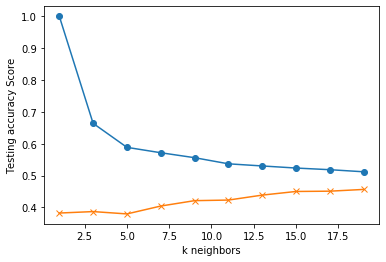

In [50]:
from sklearn.neighbors import KNeighborsClassifier

# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

# Hyperparameter Tuning

Use `GridSearchCV` to tune the `C` and `gamma` parameters

In [13]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10],
              'gamma': [0.0001, 0.001, 0.01]}
grid2 = GridSearchCV(model2, param_grid, verbose=3)

In [14]:
# Train the model with GridSearch
grid2.fit(X_train_scaled, y_train)

/Users/lpinelec/anaconda3/envs/pandas/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.847, total=   0.7s
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV] ................... C=1, gamma=0.0001, score=0.838, total=   0.7s
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.4s remaining:    0.0s


[CV] ................... C=1, gamma=0.0001, score=0.848, total=   0.7s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.847, total=   1.0s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.838, total=   0.6s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.848, total=   0.7s
[CV] C=1, gamma=0.01 .................................................
[CV] ..................... C=1, gamma=0.01, score=0.847, total=   0.8s
[CV] C=1, gamma=0.01 .................................................
[CV] ..................... C=1, gamma=0.01, score=0.838, total=   0.6s
[CV] C=1, gamma=0.01 .................................................
[CV] ..................... C=1, gamma=0.01, score=0.848, total=   0.6s
[CV] C=5, gamma=0.0001 ...............................................
[CV] .

[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:   18.5s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='linear',
                           max_iter=-1, probability=False, random_state=None,
                           shrinking=True, tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 5, 10], 'gamma': [0.0001, 0.001, 0.01]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [15]:
print(grid2.best_params_)
print(grid2.best_score_)

{'C': 10, 'gamma': 0.0001}
0.8714547118023788
